#  MTA EDA Project

##### Overview:

This project analyze where the most crowded MTA stations with most Female population to help women in 
their fight of Breast Cancer and market the new products.

###### Problem statement:

Glamified brand is proud to debut 2 new eyeshadow palettes that will support 3 organizations that do outstanding work for breast cancer education, research, awareness, and direct patient support.the company is interested in harnessing the power of data analytics to optimize the effectiveness of street team work which is crucial to boost the sales and help women in their fight of Breast Cancer. 

###### Scope of work:

This project based on the following datasets:
MTA Turnstile dataset,zipecode of nyc and census of femele in nyc 
• Data was used  for a period of more than 4 months from SEP to DEC 2020.

#### import needed libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from sqlalchemy import create_engine
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')

#### Aquire data

In [2]:
#Aquire data from SEP 2020 until end of the year
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200905, 200912, 200919, 200926, 201003, 201010, 201017, 201024, 201031, 201107, 201114, 201121, 201128, 201205, 201212, 201219, 201226]

turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454


#### SQL DATABASE

In [4]:
engine = create_engine("sqlite:///MTA_data.db")
turnstiles_df.to_sql("MTAdata",engine, if_exists='replace', index = False)

In [5]:
engine = create_engine("sqlite:///MTA_data.db")
all_tables = engine.table_names()
print(all_tables)

['MTAdata']


<ipython-input-5-0e4b1cd4c02e>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


In [6]:
turnstiles_df = pd.read_sql('SELECT * FROM MTAdata;', engine)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454
...,...,...,...,...,...,...,...,...,...,...,...
3576795,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
3576796,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
3576797,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
3576798,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541


In [7]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576800 entries, 0 to 3576799
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [8]:
#take a look of my data.
turnstiles_df.DATE.value_counts().sort_index()

08/29/2020    29454
08/30/2020    29523
08/31/2020    30101
09/01/2020    29422
09/02/2020    29499
              ...  
12/21/2020    29727
12/22/2020    30099
12/23/2020    29871
12/24/2020    30014
12/25/2020    30150
Name: DATE, Length: 119, dtype: int64

In [9]:
Numberofdays = len(turnstiles_df.DATE.unique())
print(f"Number of days in my dataset is: {Numberofdays} days")

Number of days in my dataset is: 119 days


#### Cleaning Data

In [10]:
#check the white space in columns
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [11]:
#Remove extra white space from the column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
#Add a DATE and TIME column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")
turnstiles_df.DATE_TIME

0         2020-08-29 00:00:00
1         2020-08-29 04:00:00
2         2020-08-29 08:00:00
3         2020-08-29 12:00:00
4         2020-08-29 16:00:00
                  ...        
3576795   2020-12-25 04:00:00
3576796   2020-12-25 08:00:00
3576797   2020-12-25 12:00:00
3576798   2020-12-25 16:00:00
3576799   2020-12-25 20:00:00
Name: DATE_TIME, Length: 3576800, dtype: datetime64[ns]

In [13]:
#Add a column that identfy turnstiles which is a combo of C/A, UNIT, SCP, and STATION to reduce the memory consummation 
turnstiles_df['TURNSTILE'] = turnstiles_df['C/A'] + '-' + turnstiles_df['UNIT'] + '-' + turnstiles_df['SCP']+ '-' + turnstiles_df['STATION']

In [14]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576800 entries, 0 to 3576799
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 354.8+ MB


In [15]:
#Take a look on the duplicate
#Check how many Entries i have at sepcific hour if its more 1 i will drop duplicated entries
(turnstiles_df
 .groupby(["TURNSTILE", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,TURNSTILE,STATION,DATE_TIME,ENTRIES
1817447,N532-R129-00-00-01-BERGEN ST,BERGEN ST,2020-08-31 17:00:00,2
644115,H039-R375-00-00-01-NEW LOTS,NEW LOTS,2020-09-22 05:00:00,2
1816735,N532-R129-00-00-00-BERGEN ST,BERGEN ST,2020-08-31 17:00:00,2
1986899,N701-R571-00-00-00-86 ST-2 AVE,86 ST-2 AVE,2020-09-24 09:00:00,2
3470842,R627-R063-00-00-00-SUTTER AV-RUTLD,SUTTER AV-RUTLD,2020-09-07 16:00:00,2


In [16]:
mask = ((turnstiles_df["TURNSTILE"] == "A006-R079-00-03-02-5 AV/59 ST") & 
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020,12,25).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
3365334,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,12/25/2020,01:00:00,REGULAR,1058131,952888,2020-12-25 01:00:00,A006-R079-00-03-02-5 AV/59 ST
3365335,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,12/25/2020,05:00:00,REGULAR,1058132,952888,2020-12-25 05:00:00,A006-R079-00-03-02-5 AV/59 ST
3365336,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,12/25/2020,09:00:00,REGULAR,1058137,952924,2020-12-25 09:00:00,A006-R079-00-03-02-5 AV/59 ST
3365337,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,12/25/2020,13:00:00,REGULAR,1058166,953000,2020-12-25 13:00:00,A006-R079-00-03-02-5 AV/59 ST
3365338,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,12/25/2020,17:00:00,REGULAR,1058224,953111,2020-12-25 17:00:00,A006-R079-00-03-02-5 AV/59 ST


In [17]:
mask = ((turnstiles_df["C/A"] == "A006") &
        (turnstiles_df["UNIT"] == "R079") & 
        (turnstiles_df["SCP"] == "00-03-02") & 
        (turnstiles_df["STATION"] == "5 AV/59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
756,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,08/29/2020,02:00:00,REGULAR,995117,858232,2020-08-29 02:00:00,A006-R079-00-03-02-5 AV/59 ST
757,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,08/29/2020,06:00:00,REGULAR,995117,858237,2020-08-29 06:00:00,A006-R079-00-03-02-5 AV/59 ST
758,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,08/29/2020,10:00:00,REGULAR,995135,858398,2020-08-29 10:00:00,A006-R079-00-03-02-5 AV/59 ST
759,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,08/29/2020,14:00:00,REGULAR,995167,858513,2020-08-29 14:00:00,A006-R079-00-03-02-5 AV/59 ST
760,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,08/29/2020,18:00:00,REGULAR,995275,858636,2020-08-29 18:00:00,A006-R079-00-03-02-5 AV/59 ST


In [18]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["TURNSTILE", "STATION", "DATE_TIME"], 
                          inplace=True , ascending=False)
turnstiles_df.drop_duplicates(subset=["TURNSTILE", "STATION", "DATE_TIME"], inplace=True)

In [19]:
#check after droping the duplicate . at 2016-09-16 
mask = ((turnstiles_df["C/A"] == "A002") & 
(turnstiles_df["UNIT"] == "R051") & 
(turnstiles_df["SCP"] == "02-00-00") & 
(turnstiles_df["STATION"] == "59 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 29).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,20:00:00,REGULAR,7451020,2533470,2020-08-29 20:00:00,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454,2020-08-29 16:00:00,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423,2020-08-29 12:00:00,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391,2020-08-29 08:00:00,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375,2020-08-29 04:00:00,A002-R051-02-00-00-59 ST


In [20]:
#Take a look on the duplicate
#Check how many Entries i have at sepcific hour if its more 1 i will drop duplicated entries
(turnstiles_df
 .groupby(["TURNSTILE", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,TURNSTILE,DATE_TIME,ENTRIES
0,A002-R051-02-00-00-59 ST,2020-08-29 00:00:00,1
2384521,R138-R293-00-00-04-34 ST-PENN STA,2020-10-27 02:00:00,1
2384510,R138-R293-00-00-04-34 ST-PENN STA,2020-10-25 06:00:00,1
2384511,R138-R293-00-00-04-34 ST-PENN STA,2020-10-25 10:00:00,1
2384512,R138-R293-00-00-04-34 ST-PENN STA,2020-10-25 14:00:00,1


In [21]:
# Drop Desc Column.To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["DESC"], axis=1, errors="ignore")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
3576799,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,20:00:00,5554,541,2020-12-25 20:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3576798,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,5554,541,2020-12-25 16:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3576797,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,5554,541,2020-12-25 12:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3576796,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,5554,541,2020-12-25 08:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT
3576795,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,5554,541,2020-12-25 04:00:00,TRAM2-R469-00-05-01-RIT-ROOSEVELT


In [22]:
#grouping by turnstiles locations and summing entries/exits by date
turnstiles_df = turnstiles_df.groupby(['STATION','TURNSTILE','DATE_TIME','DATE']).sum().reset_index()

In [23]:
Numberofturnstile = len(turnstiles_df["TURNSTILE"].unique())
print("There are: " , Numberofturnstile , " different TURNSTILEs")

There are:  5032  different TURNSTILEs


### Analyzing outliers and removing them

In [24]:
turnstiles_df

,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS
0,1 AV,H007-R248-00-00-00-1 AV,2020-08-29 00:00:00,08/29/2020,15470879,17378563
1,1 AV,H007-R248-00-00-00-1 AV,2020-08-29 04:00:00,08/29/2020,15470881,17378580
2,1 AV,H007-R248-00-00-00-1 AV,2020-08-29 08:00:00,08/29/2020,15470894,17378700
3,1 AV,H007-R248-00-00-00-1 AV,2020-08-29 12:00:00,08/29/2020,15470949,17378915
4,1 AV,H007-R248-00-00-00-1 AV,2020-08-29 16:00:00,08/29/2020,15471070,17379160
...,...,...,...,...,...,...
3576771,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 04:00:00,12/25/2020,39,167
3576772,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 08:00:00,12/25/2020,39,167
3576773,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 12:00:00,12/25/2020,39,167
3576774,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 16:00:00,12/25/2020,39,167


C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

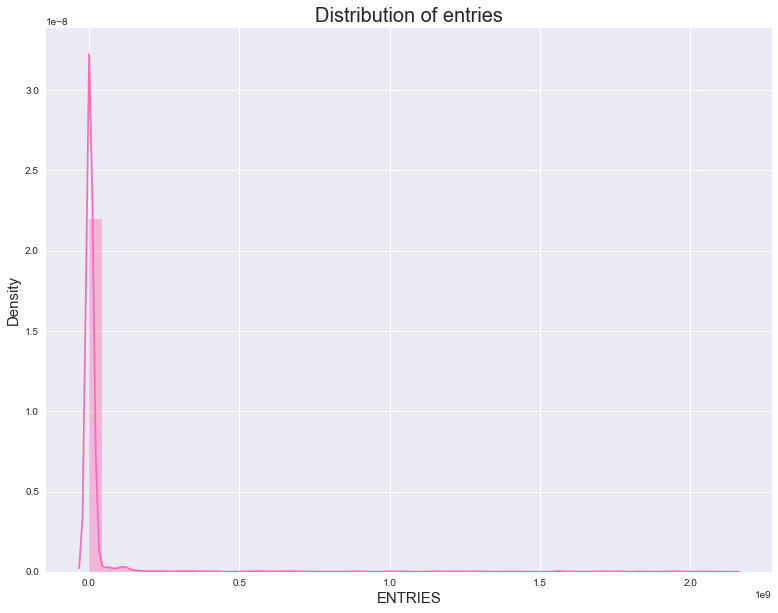

<Figure size 576x396 with 0 Axes>

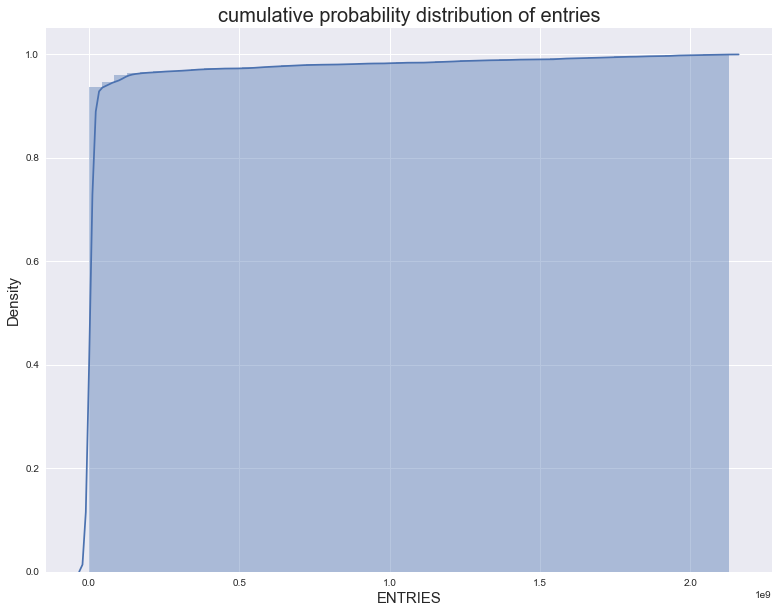

In [25]:
#check the distribution of entries

plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(turnstiles_df.ENTRIES,color='hotpink')
plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( turnstiles_df.ENTRIES,hist_kws={"cumulative":True},kde_kws={"cumulative":True})

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

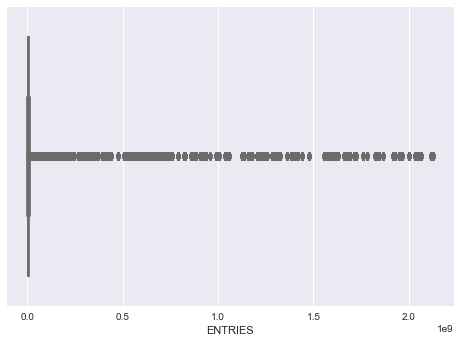

In [26]:
#Boxplot to find outliers
sns.boxplot(turnstiles_df.ENTRIES,color='hotpink')

In [27]:
#finding outliers
q3 = turnstiles_df.ENTRIES.quantile(q=0.75)
q1 = turnstiles_df.ENTRIES.quantile(q=0.25)
IQR = q3 -  q1
outlier_upper = q3 + 1.5 * IQR
outlier_lower = q1 - 1.5 * IQR
print(f"The upper bouned of outlier is: {outlier_upper} and the lower bound is: {outlier_lower}")
#we will not use the lower boued becuase it is negative , we will deal with negative values in the cumulative function

The upper bouned of outlier is: 15355963.625 and the lower bound is: -8808981.375


C:\Users\Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

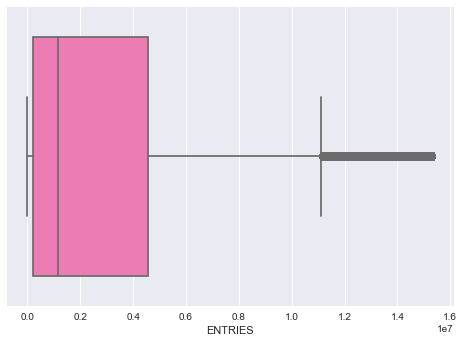

In [28]:
sns.boxplot( (turnstiles_df[turnstiles_df.ENTRIES<=outlier_upper].ENTRIES),color='hotpink')

In [29]:
print( turnstiles_df["ENTRIES"].skew())
turnstiles_df["ENTRIES"].describe()

6.805460900829863


count    3.576776e+06
mean     4.215539e+07
std      2.169392e+08
min      0.000000e+00
25%      2.528730e+05
50%      1.660361e+06
75%      6.294109e+06
max      2.128749e+09
Name: ENTRIES, dtype: float64

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of entries'}, xlabel='ENTRIES', ylabel='Density'>

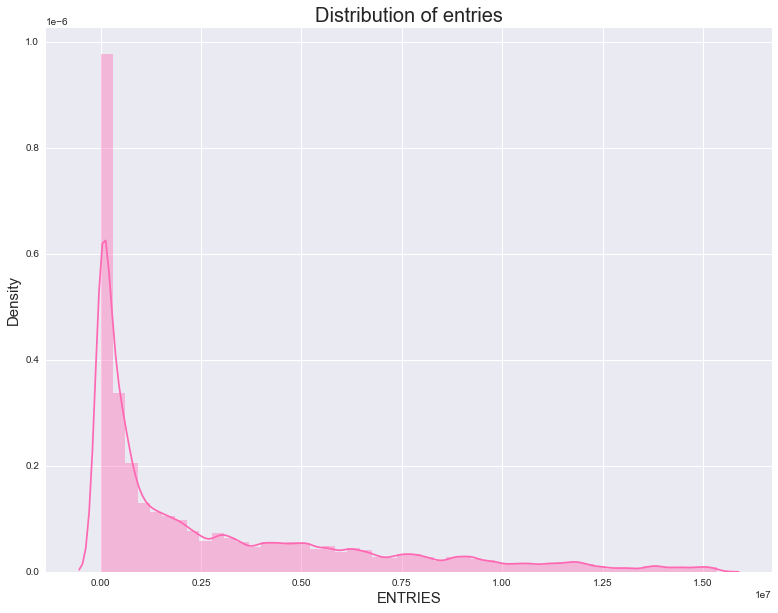

<Figure size 576x396 with 0 Axes>

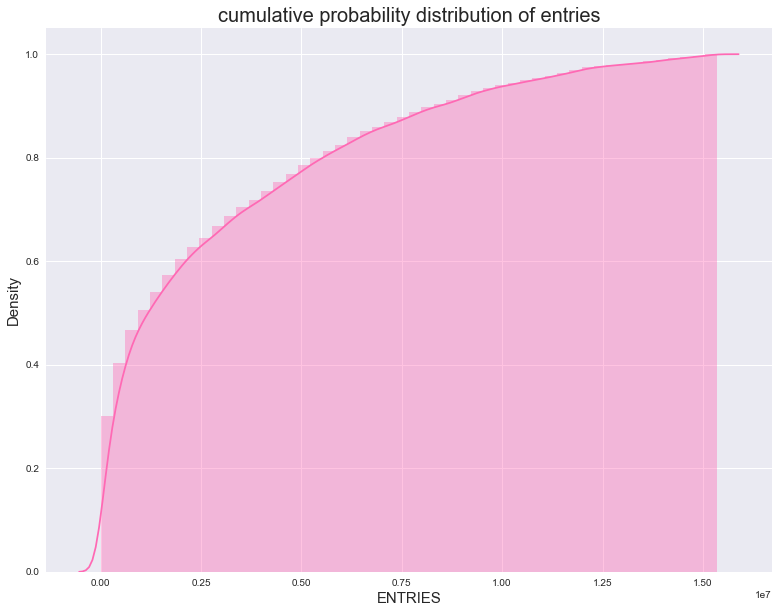

In [30]:
#check the distribution of records for entries

plt.figure(figsize=(13,10))
plt.title("Distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( (turnstiles_df.ENTRIES[turnstiles_df.ENTRIES<=outlier_upper]),color='hotpink')
plt.figure()

plt.figure(figsize=(13,10))
plt.title("cumulative probability distribution of entries", fontsize=20);
plt.xlabel("Entries", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( (turnstiles_df.ENTRIES[turnstiles_df.ENTRIES<=outlier_upper]),color='hotpink',hist_kws={"cumulative":True},kde_kws={"cumulative":True})

In [31]:
print("Number of rows before removing outliers: ",turnstiles_df.ENTRIES.count())

Number of rows before removing outliers:  3576776


In [32]:
turnstiles_df = turnstiles_df[ (turnstiles_df.ENTRIES<=outlier_upper)] #remove outliers

In [33]:
print("Number of rows after removing outliers: ",turnstiles_df.ENTRIES.count())

Number of rows after removing outliers:  3221584


In [34]:
turnstiles_df.head()

,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS
2163,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 00:00:00,08/29/2020,2608222,1131371
2164,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 04:00:00,08/29/2020,2608222,1131374
2165,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 08:00:00,08/29/2020,2608222,1131378
2166,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 12:00:00,08/29/2020,2608225,1131384
2167,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 16:00:00,08/29/2020,2608238,1131394


#### Daily entries

In [35]:
#Add shifted columns to show previous entries and exits
turnstiles_df[['PREV_DATETIME', "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df
                                                .groupby(['TURNSTILE', 'STATION'])\
                                                       ['DATE','ENTRIES','EXITS']
                                                .apply(lambda grp: grp.shift(1)))

<ipython-input-35-fffb7ef1e437>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_df[['PREV_DATETIME', "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df
C:\Users\Computer\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
print(turnstiles_df.isnull().sum())

STATION             0
TURNSTILE           0
DATE_TIME           0
DATE                0
ENTRIES             0
EXITS               0
PREV_DATETIME    4550
PREV_ENTRIES     4550
PREV_EXITS       4550
dtype: int64


In [37]:
turnstiles_df.dropna( axis=0, inplace=True)

<ipython-input-37-d8bac645ecd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_df.dropna( axis=0, inplace=True)


In [38]:
turnstiles_df.head()

,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS
2164,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 04:00:00,08/29/2020,2608222,1131374,08/29/2020,2608222.0,1131371.0
2165,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 08:00:00,08/29/2020,2608222,1131378,08/29/2020,2608222.0,1131374.0
2166,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 12:00:00,08/29/2020,2608225,1131384,08/29/2020,2608222.0,1131378.0
2167,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 16:00:00,08/29/2020,2608238,1131394,08/29/2020,2608225.0,1131384.0
2168,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 20:00:00,08/29/2020,2608246,1131405,08/29/2020,2608238.0,1131394.0


In [39]:
#check if there are  negative values
turnstiles_df[ ((turnstiles_df.ENTRIES - turnstiles_df.PREV_ENTRIES) < 0)] 

,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS
14288,1 AV,H008-R248-01-00-00-1 AV,2020-12-25 15:00:00,12/25/2020,9,17,12/24/2020,310200.0,5092625.0
20074,103 ST,R170-R191-00-00-00-103 ST,2020-12-22 12:00:00,12/22/2020,4,3,12/22/2020,2888879.0,1203588.0
58284,116 ST,N029-R333-01-00-02-116 ST,2020-10-23 17:00:00,10/23/2020,89,162,10/03/2020,458890.0,650860.0
59024,116 ST,N030-R333-00-00-00-116 ST,2020-10-28 13:00:00,10/28/2020,61,89,10/28/2020,45574.0,87496.0
68980,116 ST,R302-R324-01-00-03-116 ST,2020-10-03 17:00:00,10/03/2020,59,49,10/01/2020,31511.0,16701.0
...,...,...,...,...,...,...,...,...,...
3532866,WORLD TRADE CTR,N094-R029-01-00-00-WORLD TRADE CTR,2020-09-01 12:00:00,09/01/2020,939737,1685329,09/01/2020,980677.0,1685233.0
3543339,WORLD TRADE CTR,N094-R029-01-06-01-WORLD TRADE CTR,2020-09-04 08:00:00,09/04/2020,414856,97834,09/04/2020,447613.0,97826.0
3566402,WTC-CORTLANDT,R108A-R305-05-00-00-WTC-CORTLANDT,2020-10-21 21:00:00,10/21/2020,6,38,10/21/2020,547.0,22567.0
3570932,YORK ST,N530-R301-00-00-00-YORK ST,2020-12-02 12:00:00,12/02/2020,109,534,12/02/2020,99774.0,179747.0


In [40]:
#check the count is it increasing each day ?
# we should have count(yesterday) < count(today)

counter_mask = (turnstiles_df['ENTRIES'] < turnstiles_df['PREV_ENTRIES']) 
turnstiles_df[counter_mask].head()

,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS
14288,1 AV,H008-R248-01-00-00-1 AV,2020-12-25 15:00:00,12/25/2020,9,17,12/24/2020,310200.0,5092625.0
20074,103 ST,R170-R191-00-00-00-103 ST,2020-12-22 12:00:00,12/22/2020,4,3,12/22/2020,2888879.0,1203588.0
58284,116 ST,N029-R333-01-00-02-116 ST,2020-10-23 17:00:00,10/23/2020,89,162,10/03/2020,458890.0,650860.0
59024,116 ST,N030-R333-00-00-00-116 ST,2020-10-28 13:00:00,10/28/2020,61,89,10/28/2020,45574.0,87496.0
68980,116 ST,R302-R324-01-00-03-116 ST,2020-10-03 17:00:00,10/03/2020,59,49,10/01/2020,31511.0,16701.0


In [41]:
turnstiles_df = turnstiles_df.reset_index()
turnstiles_df

,index,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS
0,2164,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 04:00:00,08/29/2020,2608222,1131374,08/29/2020,2608222.0,1131371.0
1,2165,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 08:00:00,08/29/2020,2608222,1131378,08/29/2020,2608222.0,1131374.0
2,2166,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 12:00:00,08/29/2020,2608225,1131384,08/29/2020,2608222.0,1131378.0
3,2167,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 16:00:00,08/29/2020,2608238,1131394,08/29/2020,2608225.0,1131384.0
4,2168,1 AV,H007-R248-00-03-01-1 AV,2020-08-29 20:00:00,08/29/2020,2608246,1131405,08/29/2020,2608238.0,1131394.0
...,...,...,...,...,...,...,...,...,...,...
3217029,3576771,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 04:00:00,12/25/2020,39,167,12/25/2020,39.0,167.0
3217030,3576772,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 08:00:00,12/25/2020,39,167,12/25/2020,39.0,167.0
3217031,3576773,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 12:00:00,12/25/2020,39,167,12/25/2020,39.0,167.0
3217032,3576774,ZEREGA AV,R419-R326-00-05-01-ZEREGA AV,2020-12-25 16:00:00,12/25/2020,39,167,12/25/2020,39.0,167.0


In [42]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter *= -1
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_df["DAILY_ENTRIES"] = turnstiles_df.apply(get_daily_counts, axis=1, max_counter=1000000)

4 2888879.0
76 7355347.0
65547 2356117.0
15 2787060.0
33 1143547.0
38 6817289.0
9 1031476.0
11 2493909.0
25 3319940.0
29 1311704.0
4 10732001.0
31 15171602.0
77 15185542.0
720921 6946581.0
137 6289174.0
109 2087362.0
179 5182776.0
75 10323597.0
1027 2419691.0
37 3334743.0
3 6496220.0
5 3055293.0
21 9679898.0
35 6658385.0
25 5373991.0
18 1437665.0
592391 4715183.0
3 4008525.0
55 8876720.0
9 1630880.0
5 2642748.0
78 2836277.0
32 6478782.0
1 3953153.0
7 5434278.0
5434731 7.0
7 5434731.0
5434840 7.0
7 5434840.0
5434840 7.0
8 5437122.0
5437656 8.0
8 5437656.0
5438155 8.0
72 3795641.0
29 3299872.0
28 1197880.0
0 2822958.0
63 5239290.0
3 3251529.0
65 2867987.0
25 5324632.0
5 13122746.0
5 2166896.0
870499 2522356.0
58 2427404.0
70 5125484.0
18 1208236.0
11 3963035.0
1 1264348.0
99 3145331.0
10 2867836.0
148 1615190.0
4456707 49380.0
49518 4456707.0
4456725 49518.0
49635 4456725.0
4456900 49635.0
49710 4456900.0
4456968 49710.0
49733 4456968.0
3302614 519300.0
519453 3302614.0
3302619 519453.0


In [43]:
#Function to get the hourly exits


def get_daily_counts(row, max_count):
    count = row['EXITS'] - row['PREV_EXITS']
    
    if count < 0:
        count *= -1
        
    if count > max_count:
        count = min(row["EXITS"], row["PREV_EXITS"])
    if count > max_count:
      #overshotting case
        return 0
    return count

turnstiles_df['Daily_EXITS'] =  turnstiles_df.apply(get_daily_counts, axis=1, max_count=1000000)

In [44]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217034 entries, 0 to 3217033
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   index          int64         
 1   STATION        object        
 2   TURNSTILE      object        
 3   DATE_TIME      datetime64[ns]
 4   DATE           object        
 5   ENTRIES        int64         
 6   EXITS          int64         
 7   PREV_DATETIME  object        
 8   PREV_ENTRIES   float64       
 9   PREV_EXITS     float64       
 10  DAILY_ENTRIES  float64       
 11  Daily_EXITS    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 294.5+ MB


In [45]:
print("nulls in entries: " , sum(turnstiles_df.isna().DAILY_ENTRIES))
print("nulls in exits: " , sum(turnstiles_df.isna().Daily_EXITS))

nulls in entries:  0
nulls in exits:  0


In [46]:
turnstiles_df = turnstiles_df.sort_values(by = "DAILY_ENTRIES", ascending=False)
turnstiles_df.head(20)

,index,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,Daily_EXITS
2008148,2266633,FULTON ST,N095A-R014-01-03-02-FULTON ST,2020-09-01 17:00:00,09/01/2020,3834089,6589803,09/01/2020,984108.0,352635.0,984108.0,352635.0
1294342,1468996,AVENUE U,D015-R396-00-03-00-AVENUE U,2020-09-07 21:00:00,09/07/2020,24,18,09/07/2020,968377.0,493121.0,968353.0,493103.0
977880,1113545,71 ST,E009-R370-00-06-00-71 ST,2020-11-26 15:00:00,11/26/2020,524304,6,11/23/2020,1485358.0,104087.0,961054.0,104081.0
1634749,1849281,CHRISTOPHER ST,R125-R189-00-00-00-CHRISTOPHER ST,2020-11-17 15:00:00,11/17/2020,41,19,11/16/2020,922970.0,985813.0,922929.0,985794.0
1854031,2096739,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-08 20:00:00,09/08/2020,1236003,358223,09/08/2020,338297.0,48852.0,897706.0,309371.0
1854029,2096737,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-08 16:00:00,09/08/2020,1235952,358143,09/08/2020,338295.0,48849.0,897657.0,309294.0
1854030,2096738,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-08 17:00:00,09/08/2020,338297,48852,09/08/2020,1235952.0,358143.0,897655.0,309291.0
1854033,2096741,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-09 01:00:00,09/09/2020,1236026,358250,09/08/2020,338377.0,48857.0,897649.0,309393.0
1854032,2096740,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-08 21:00:00,09/08/2020,338377,48857,09/08/2020,1236003.0,358223.0,897626.0,309366.0
1854027,2096735,EUCLID AV,N128-R200-00-00-00-EUCLID AV,2020-09-08 12:00:00,09/08/2020,1235855,358089,09/08/2020,338283.0,48842.0,897572.0,309247.0


In [47]:
turnstiles_df.DAILY_ENTRIES.describe()

count    3.217034e+06
mean     6.397792e+01
std      3.177466e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+01
75%      6.000000e+01
max      9.841080e+05
Name: DAILY_ENTRIES, dtype: float64

### ZIPCODE and Stations Dataset Joined to MTA Turnstile Dataset

In [48]:
zipcode_stn_df= pd.read_csv("ZipcodeSationsInBk.csv")
zipcode_stn_df

,STATION,ZIPCODE
0,15 ST-PROSPECT,11215
1,4 AV-9 ST,11215
2,4AV-9 ST,11215
3,7 AV,11215
4,PROSPECT AV,11215
...,...,...
157,NASSAU AV,11222
158,JUNIUS ST,11212
159,ROCKAWAY AV,11212
160,SARATOGA AV,11212


In [49]:
#Now making an inner join to extract only data of stations in Brooklyn
turnstiles_bk_df = turnstiles_df.merge(zipcode_stn_df, on='STATION',how='inner')
turnstiles_bk_df.head()

,index,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,Daily_EXITS,ZIPCODE
0,2266633,FULTON ST,N095A-R014-01-03-02-FULTON ST,2020-09-01 17:00:00,09/01/2020,3834089,6589803,09/01/2020,984108.0,352635.0,984108.0,352635.0,11217
1,2260131,FULTON ST,N095-R014-00-03-08-FULTON ST,2020-12-19 12:00:00,12/19/2020,11,32,12/19/2020,28491.0,111953.0,28480.0,111921.0,11217
2,2310790,FULTON ST,R208-R014-03-03-00-FULTON ST,2020-11-26 16:00:00,11/26/2020,5,6,11/25/2020,2355.0,49913.0,2350.0,49907.0,11217
3,2280604,FULTON ST,N422-R318-00-00-01-FULTON ST,2020-11-05 19:00:00,11/05/2020,5634714,5079658,11/05/2020,5634298.0,5079516.0,416.0,142.0,11217
4,2281283,FULTON ST,N422-R318-00-00-02-FULTON ST,2020-10-30 20:00:00,10/30/2020,4841130,1601365,10/30/2020,4840738.0,1601238.0,392.0,127.0,11217


In [50]:
turnstiles_bk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379453 entries, 0 to 1379452
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   index          1379453 non-null  int64         
 1   STATION        1379453 non-null  object        
 2   TURNSTILE      1379453 non-null  object        
 3   DATE_TIME      1379453 non-null  datetime64[ns]
 4   DATE           1379453 non-null  object        
 5   ENTRIES        1379453 non-null  int64         
 6   EXITS          1379453 non-null  int64         
 7   PREV_DATETIME  1379453 non-null  object        
 8   PREV_ENTRIES   1379453 non-null  float64       
 9   PREV_EXITS     1379453 non-null  float64       
 10  DAILY_ENTRIES  1379453 non-null  float64       
 11  Daily_EXITS    1379453 non-null  float64       
 12  ZIPCODE        1379453 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 147.3+ MB


### Visualization

In [51]:
turnstiles_bk_df["TOTAL_TRAFFIC"] = turnstiles_bk_df["Daily_EXITS"] + turnstiles_bk_df["DAILY_ENTRIES"]

In [52]:
station_top5 = turnstiles_bk_df.groupby(["STATION","DATE"])[['TOTAL_TRAFFIC']].sum().reset_index()
station_top5.head()

,STATION,DATE,TOTAL_TRAFFIC
0,15 ST-PROSPECT,08/29/2020,985.0
1,15 ST-PROSPECT,08/30/2020,1703.0
2,15 ST-PROSPECT,08/31/2020,2052.0
3,15 ST-PROSPECT,09/01/2020,2109.0
4,15 ST-PROSPECT,09/02/2020,2133.0


In [53]:
stations_total = station_top5.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index().head(5)

stations_total

,STATION,TOTAL_TRAFFIC
0,EUCLID AV,16839474.0
1,KINGS HWY,14404371.0
2,86 ST,11406126.0
3,CHURCH AV,7282050.0
4,AVENUE U,6951276.0


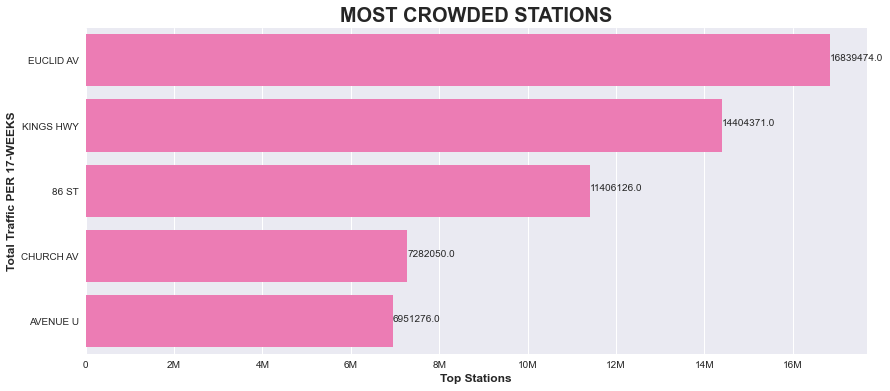

<Figure size 576x396 with 0 Axes>

In [54]:

plt.figure(figsize = [14,6])

sns.barplot(x='TOTAL_TRAFFIC',y = 'STATION',data=stations_total,color='hotpink')
sns.despine()
plt.xlabel("Top Stations",fontsize = 12, weight = 'bold')
plt.ylabel('Total Traffic PER 17-WEEKS',fontsize = 12, weight = 'bold')
plt.xticks([0,2000000,4000000,6000000,8000000,10000000,12000000,14000000,16000000],["0","2M","4M","6M","8M","10M","12M","14M","16M"])
plt.title("MOST CROWDED STATIONS",fontsize = 20, weight = 'bold')
sns.despine()
sns.set_style("white")
#show the value for each bar
for index, value in enumerate(stations_total['TOTAL_TRAFFIC']):
    plt.text(value,index,str(value))
    
plt.show()
plt.savefig("MOST CROWDED STATIONS.png")

#### Find the Top 3 stations are more cowded in weekday and weekend

In [55]:
turnstiles_bk_df['DATE'] = pd.to_datetime(turnstiles_bk_df['DATE'], cache=True)
turnstiles_bk_df['Week_Day'] = turnstiles_bk_df['DATE'].dt.day_name() #New column to identify the name of day.
turnstiles_bk_df

,index,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,Daily_EXITS,ZIPCODE,TOTAL_TRAFFIC,Week_Day
0,2266633,FULTON ST,N095A-R014-01-03-02-FULTON ST,2020-09-01 17:00:00,2020-09-01,3834089,6589803,09/01/2020,984108.0,352635.0,984108.0,352635.0,11217,1336743.0,Tuesday
1,2260131,FULTON ST,N095-R014-00-03-08-FULTON ST,2020-12-19 12:00:00,2020-12-19,11,32,12/19/2020,28491.0,111953.0,28480.0,111921.0,11217,140401.0,Saturday
2,2310790,FULTON ST,R208-R014-03-03-00-FULTON ST,2020-11-26 16:00:00,2020-11-26,5,6,11/25/2020,2355.0,49913.0,2350.0,49907.0,11217,52257.0,Thursday
3,2280604,FULTON ST,N422-R318-00-00-01-FULTON ST,2020-11-05 19:00:00,2020-11-05,5634714,5079658,11/05/2020,5634298.0,5079516.0,416.0,142.0,11217,558.0,Thursday
4,2281283,FULTON ST,N422-R318-00-00-02-FULTON ST,2020-10-30 20:00:00,2020-10-30,4841130,1601365,10/30/2020,4840738.0,1601238.0,392.0,127.0,11217,519.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379448,2008975,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-07 04:00:00,2020-09-07,4898153,2951490,09/07/2020,4898153.0,2951482.0,0.0,8.0,11208,8.0,Monday
1379449,2008981,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-08 04:00:00,2020-09-08,4898318,2951615,09/08/2020,4898318.0,2951607.0,0.0,8.0,11208,8.0,Tuesday
1379450,2008993,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-10 04:00:00,2020-09-10,4898871,2952031,09/10/2020,4898871.0,2952024.0,0.0,7.0,11208,7.0,Thursday
1379451,2009017,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-14 04:00:00,2020-09-14,4899825,2952723,09/14/2020,4899825.0,2952716.0,0.0,7.0,11208,7.0,Monday


In [56]:
turnstiles_bk_df['WEEKEND'] = (turnstiles_bk_df['Week_Day']
                                   .apply(lambda x: 'WEEKEND' 
                                          if (x == 'Saturday' or x == 'Sunday') 
                                          else 'WEEKDAY'))

turnstiles_bk_df

,index,STATION,TURNSTILE,DATE_TIME,DATE,ENTRIES,EXITS,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,Daily_EXITS,ZIPCODE,TOTAL_TRAFFIC,Week_Day,WEEKEND
0,2266633,FULTON ST,N095A-R014-01-03-02-FULTON ST,2020-09-01 17:00:00,2020-09-01,3834089,6589803,09/01/2020,984108.0,352635.0,984108.0,352635.0,11217,1336743.0,Tuesday,WEEKDAY
1,2260131,FULTON ST,N095-R014-00-03-08-FULTON ST,2020-12-19 12:00:00,2020-12-19,11,32,12/19/2020,28491.0,111953.0,28480.0,111921.0,11217,140401.0,Saturday,WEEKEND
2,2310790,FULTON ST,R208-R014-03-03-00-FULTON ST,2020-11-26 16:00:00,2020-11-26,5,6,11/25/2020,2355.0,49913.0,2350.0,49907.0,11217,52257.0,Thursday,WEEKDAY
3,2280604,FULTON ST,N422-R318-00-00-01-FULTON ST,2020-11-05 19:00:00,2020-11-05,5634714,5079658,11/05/2020,5634298.0,5079516.0,416.0,142.0,11217,558.0,Thursday,WEEKDAY
4,2281283,FULTON ST,N422-R318-00-00-02-FULTON ST,2020-10-30 20:00:00,2020-10-30,4841130,1601365,10/30/2020,4840738.0,1601238.0,392.0,127.0,11217,519.0,Friday,WEEKDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379448,2008975,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-07 04:00:00,2020-09-07,4898153,2951490,09/07/2020,4898153.0,2951482.0,0.0,8.0,11208,8.0,Monday,WEEKDAY
1379449,2008981,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-08 04:00:00,2020-09-08,4898318,2951615,09/08/2020,4898318.0,2951607.0,0.0,8.0,11208,8.0,Tuesday,WEEKDAY
1379450,2008993,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-10 04:00:00,2020-09-10,4898871,2952031,09/10/2020,4898871.0,2952024.0,0.0,7.0,11208,7.0,Thursday,WEEKDAY
1379451,2009017,CYPRESS HILLS,J025-R003-00-00-02-CYPRESS HILLS,2020-09-14 04:00:00,2020-09-14,4899825,2952723,09/14/2020,4899825.0,2952716.0,0.0,7.0,11208,7.0,Monday,WEEKDAY


In [57]:
station_avg_weekend = turnstiles_bk_df[turnstiles_bk_df.WEEKEND=='WEEKEND'].groupby([ 'STATION','WEEKEND'])[['TOTAL_TRAFFIC']].sum().round(0).reset_index().head(5)
station_avg_weekday = turnstiles_bk_df[turnstiles_bk_df.WEEKEND=='WEEKDAY'].groupby([ 'STATION','WEEKEND'])[['TOTAL_TRAFFIC']].sum().round(0).reset_index().head(5)

In [58]:
station_avg_weekend

,STATION,WEEKEND,TOTAL_TRAFFIC
0,15 ST-PROSPECT,WEEKEND,56281.0
1,18 AV,WEEKEND,1833447.0
2,20 AV,WEEKEND,212570.0
3,25 AV,WEEKEND,44008.0
4,25 ST,WEEKEND,56840.0


In [59]:
station_avg_weekday

,STATION,WEEKEND,TOTAL_TRAFFIC
0,15 ST-PROSPECT,WEEKDAY,247702.0
1,18 AV,WEEKDAY,1914837.0
2,20 AV,WEEKDAY,918172.0
3,25 AV,WEEKDAY,187825.0
4,25 ST,WEEKDAY,263651.0


In [60]:
station_avg_weekday.sort_values(['TOTAL_TRAFFIC'], ascending=False)\
.reset_index().head(10)

,index,STATION,WEEKEND,TOTAL_TRAFFIC
0,1,18 AV,WEEKDAY,1914837.0
1,2,20 AV,WEEKDAY,918172.0
2,4,25 ST,WEEKDAY,263651.0
3,0,15 ST-PROSPECT,WEEKDAY,247702.0
4,3,25 AV,WEEKDAY,187825.0


In [61]:
station_avg_weekend['TOTAL_TRAFFIC_WEEKDAY']=station_avg_weekday['TOTAL_TRAFFIC']
station_avg_weekend['TOTAL_TRAFFIC_WEEKEND']=station_avg_weekend['TOTAL_TRAFFIC']
station_avg_weekend.drop(['TOTAL_TRAFFIC','WEEKEND'], axis=1,inplace=True)
station_avg_weekend.sort_values(['TOTAL_TRAFFIC_WEEKDAY', 'TOTAL_TRAFFIC_WEEKEND'], ascending=False)\
    .reset_index()
station_avg_df=station_avg_weekend.head(5)
station_avg_df

,STATION,TOTAL_TRAFFIC_WEEKDAY,TOTAL_TRAFFIC_WEEKEND
0,15 ST-PROSPECT,247702.0,56281.0
1,18 AV,1914837.0,1833447.0
2,20 AV,918172.0,212570.0
3,25 AV,187825.0,44008.0
4,25 ST,263651.0,56840.0


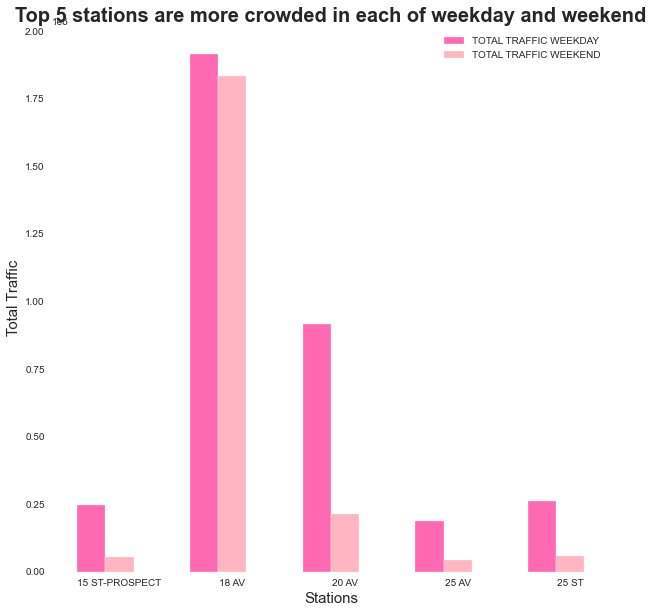

<Figure size 576x396 with 0 Axes>

In [62]:
plt.figure(figsize=[10,10])
barWidth = 0.25
r1 = np.arange(len(station_avg_df['TOTAL_TRAFFIC_WEEKDAY']))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1,station_avg_df['TOTAL_TRAFFIC_WEEKDAY'], color= 'hotpink', width=barWidth, edgecolor='white', label='TOTAL TRAFFIC WEEKDAY')
plt.bar(r2,station_avg_df['TOTAL_TRAFFIC_WEEKEND'], color='lightpink', width=barWidth, edgecolor='white', label='TOTAL TRAFFIC WEEKEND')

plt.xticks([r + barWidth for r in range(len(station_avg_df['TOTAL_TRAFFIC_WEEKEND']))], station_avg_df['STATION'])
plt.title('Top 5 stations are more crowded in each of weekday and weekend', size=20, weight='bold')
plt.rcParams['font.size']= 12
plt.xlabel("Stations", size=15)
plt.ylabel(" Total Traffic", size=15)
plt.legend()
plt.show()
plt.savefig('topfiveweek.png') # To save the plot.


In [90]:
top_by_day = turnstiles_bk_df.groupby(["Week_Day","WEEKEND"])[['DAILY_ENTRIES']].sum().reset_index()
top_by_day.head()

,Week_Day,WEEKEND,DAILY_ENTRIES
0,Friday,WEEKDAY,11704655.0
1,Monday,WEEKDAY,14032315.0
2,Saturday,WEEKEND,12201132.0
3,Sunday,WEEKEND,8021106.0
4,Thursday,WEEKDAY,12722604.0


In [91]:
mask = ((top_by_day['WEEKEND'] =='WEEKDAY'))

top_by_day=top_by_day[mask]
top_by_day
top_by_day.sort_values(['DAILY_ENTRIES'], ascending=False)\
    .reset_index()

,index,Week_Day,WEEKEND,DAILY_ENTRIES
0,5,Tuesday,WEEKDAY,26623546.0
1,1,Monday,WEEKDAY,14032315.0
2,6,Wednesday,WEEKDAY,13722830.0
3,4,Thursday,WEEKDAY,12722604.0
4,0,Friday,WEEKDAY,11704655.0


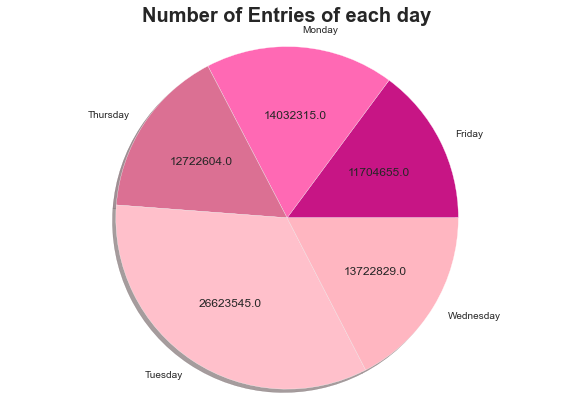

In [114]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
colors = ['mediumvioletred', 'hotpink','palevioletred','pink','lightpink']
def absolute_value(val):
    a  = np.round(val/100.*top_by_day.DAILY_ENTRIES.sum(), 0)
    return a

plt.pie(top_by_day.DAILY_ENTRIES, labels = top_by_day.Week_Day,autopct=absolute_value,colors=colors, shadow=True)
plt.axis('equal')
plt.title("Number of Entries of each day", size=20, weight='bold')
# show plot
plt.show()